In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import glob
import os
import seaborn as sns
from pylab import *
import math
from IPython.display import Image
from IPython.display import display
from __future__ import print_function
from PIL import Image
import numpy as np
from matplotlib.mlab import PCA

In [2]:
os.chdir(r'O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v3_log\All_summary')

In [37]:
# read AP scores and AE scores

APdf = pd.read_csv('O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v3_log\All_summary\APscore_Pop2Pop34\APdf.csv')
ACdf = pd.read_csv('O:\ImStor\sorger\data\Cytell\Kyun\cycIF_analysis_python_v3_log\All_summary\ACscore_Pop1Pop26\ACdf.csv')

# add 'AP' or 'AE' to the antibody names

##APnames = list(APdf.columns)
##ACnames = list(ACdf.columns)

ACnames = ['Treatment', 'pAkt_N', 'pAkt_C', 'pHis3_N', 'pHis3_C', 'bCat_N',
        'bCat_C', 'NFkB_N', 'NFkB_C', 'Ecad_N', 'Ecad_C', 'pErk_N', 'pErk_C',
        'pS6-235_N', 'pS6-235_C', 'pRB_N', 'pRB_C', 'Ki67_N', 'Ki67_C',
        'pStat3_N', 'pStat3_C', 'pS6-240_N', 'pS6-240_C', 'pAurk_N', 'pAurk_C',
        'Foxo3a_N', 'Foxo3a_C', 'pSmad1/5_N', 'pSmad1/5_C', 'pSmad2/3_N',
        'pSmad2/3_C', 'Vimentin_N', 'Vimentin_C', 'pJNK_N', 'pJNK_C', 'pp38_N',
        'pp38_C', 'cMyc_N', 'cMyc_C', 'p21_N', 'p21_C', 'cJun_N', 'cJun_C',
        'Yap_N', 'Yap_C', 'aNotch1_N', 'aNotch1_C', 'pSrc_N', 'pSrc_C', 'p27_N',
        'p27_C', 'ERa_N', 'ERa_C', 'CyclinD1_N', 'CyclinD1_C', 'CellLine',
        'Treatment.1', 'Time']
APnames = ['Treatment', 'pAkt_N', 'pAkt_C', 'pHis3_N', 'pHis3_C', 'bCat_N',
        'bCat_C', 'NFkB_N', 'NFkB_C', 'Ecad_N', 'Ecad_C', 'pErk_N', 'pErk_C',
        'pS6-235_N', 'pS6-235_C', 'pRB_N', 'pRB_C', 'Ki67_N', 'Ki67_C',
        'pStat3_N', 'pStat3_C', 'pS6-240_N', 'pS6-240_C', 'pAurk_N', 'pAurk_C',
        'Foxo3a_N', 'Foxo3a_C', 'pSmad1/5_N', 'pSmad1/5_C', 'pSmad2/3_N',
        'pSmad2/3_C', 'Vimentin_N', 'Vimentin_C', 'pJNK_N', 'pJNK_C', 'pp38_N',
        'pp38_C', 'cMyc_N', 'cMyc_C', 'p21_N', 'p21_C', 'cJun_N', 'cJun_C',
        'Yap_N', 'Yap_C', 'aNotch1_N', 'aNotch1_C', 'pSrc_N', 'pSrc_C', 'p27_N',
        'p27_C', 'ERa_N', 'ERa_C', 'CyclinD1_N', 'CyclinD1_C', 'CellLine',
        'Treatment.1', 'Time']

ACnames = ["AE:" + name for name in ACnames]
APnames = ["AP:" + name for name in APnames]

# renames the column labeling
APdf.columns = APnames
ACdf.columns = ACnames

# concatenate AP and AE dataframes ands save it to cvs file
APACdf = pd.concat([APdf, ACdf], axis=1)
APACdf.to_csv('AP_AC_Pop1Pop26.csv')

In [38]:
# read APAEall.csv file
APACdf = pd.read_csv('AP_AC_Pop1Pop26.csv')

# make a new dataframe (df1) with selected columns
df1 = APACdf[['AP:Treatment', 'AP:pAkt_N', 'AP:pAkt_C', 'AP:pHis3_N', 'AP:pHis3_C', 'AP:bCat_N', 'AP:bCat_C', 'AP:NFkB_N',
 'AP:NFkB_C', 'AP:Ecad_N', 'AP:Ecad_C', 'AP:pErk_N', 'AP:pErk_C', 'AP:pS6-235_N', 'AP:pS6-235_C', 'AP:pRB_N', 'AP:pRB_C',
 'AP:Ki67_N', 'AP:Ki67_C', 'AP:pStat3_N', 'AP:pStat3_C', 'AP:pS6-240_N', 'AP:pS6-240_C', 'AP:pAurk_N', 'AP:pAurk_C',
 'AP:Foxo3a_N', 'AP:Foxo3a_C', 'AP:pSmad1/5_N', 'AP:pSmad1/5_C', 'AP:pSmad2/3_N', 'AP:pSmad2/3_C', 'AP:Vimentin_N',
 'AP:Vimentin_C', 'AP:pJNK_N', 'AP:pJNK_C', 'AP:pp38_N', 'AP:pp38_C', 'AP:cMyc_N', 'AP:cMyc_C', 'AP:p21_N', 'AP:p21_C',
 'AP:cJun_N', 'AP:cJun_C', 'AP:Yap_N', 'AP:Yap_C', 'AP:aNotch1_N', 'AP:aNotch1_C', 'AP:pSrc_N', 'AP:pSrc_C', 'AP:p27_N',
 'AP:p27_C', 'AP:ERa_N', 'AP:ERa_C', 'AP:CyclinD1_N', 'AP:CyclinD1_C',               
              'AP:CellLine',  'AP:Time',
 
 'AE:pAkt_N', 'AE:pAkt_C', 'AE:pHis3_N', 'AE:pHis3_C', 'AE:bCat_N', 'AE:bCat_C', 'AE:NFkB_N', 'AE:NFkB_C', 'AE:Ecad_N',
 'AE:Ecad_C', 'AE:pErk_N', 'AE:pErk_C', 'AE:pS6-235_N', 'AE:pS6-235_C', 'AE:pRB_N', 'AE:pRB_C', 'AE:Ki67_N', 'AE:Ki67_C',
 'AE:pStat3_N', 'AE:pStat3_C', 'AE:pS6-240_N', 'AE:pS6-240_C', 'AE:pAurk_N', 'AE:pAurk_C', 'AE:Foxo3a_N', 'AE:Foxo3a_C',
 'AE:pSmad1/5_N', 'AE:pSmad1/5_C', 'AE:pSmad2/3_N', 'AE:pSmad2/3_C', 'AE:Vimentin_N', 'AE:Vimentin_C', 'AE:pJNK_N',
 'AE:pJNK_C', 'AE:pp38_N', 'AE:pp38_C', 'AE:cMyc_N', 'AE:cMyc_C', 'AE:p21_N', 'AE:p21_C', 'AE:cJun_N', 'AE:cJun_C',
 'AE:Yap_N', 'AE:Yap_C', 'AE:aNotch1_N', 'AE:aNotch1_C', 'AE:pSrc_N', 'AE:pSrc_C', 'AE:p27_N', 'AE:p27_C', 'AE:ERa_N',
 'AE:ERa_C', 'AE:CyclinD1_N', 'AE:CyclinD1_C',
              'AE:CellLine', 'AE:Treatment'
 ]]

In [39]:
#df1.head()
#df1[df1['AP:CellLine'] == 'BT483']

# make ID column by combining CellLine and Treatment
df1['ID'] = df1['AP:CellLine'] + ':' + df1['AP:Treatment']

# name index with ID column
df1.set_index(df1['ID'])

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,AP:Treatment,AP:pAkt_N,AP:pAkt_C,AP:pHis3_N,AP:pHis3_C,AP:bCat_N,AP:bCat_C,AP:NFkB_N,AP:NFkB_C,AP:Ecad_N,...,AE:pSrc_C,AE:p27_N,AE:p27_C,AE:ERa_N,AE:ERa_C,AE:CyclinD1_N,AE:CyclinD1_C,AE:CellLine,AE:Treatment,ID
ID,,,,,,,,,,,,,,,,,,,,,
BT483:DMSO,DMSO,-0.214834,-0.170539,1.046674,0.928949,0.316720,0.381623,0.458199,0.577573,0.280474,...,0.904578,0.120404,0.404519,1.031561,0.908968,0.526457,0.983867,BT483,DMSO,BT483:DMSO
MCF7:DMSO,DMSO,0.978139,1.046262,0.298403,0.303955,0.465090,0.461121,0.142809,0.106951,0.117667,...,0.627596,0.451674,0.384557,1.257350,0.895635,-0.915435,-0.442058,MCF7,DMSO,MCF7:DMSO
T47D:DMSO,DMSO,1.091835,1.005695,0.709845,0.504815,0.813423,0.896709,0.159749,0.159762,0.234851,...,1.286727,0.454893,1.583316,1.211914,1.251133,0.532400,1.332255,T47D,DMSO,T47D:DMSO
EFM19:DMSO,DMSO,0.528187,0.516870,1.009318,0.850521,-0.183729,-0.120643,0.271636,0.398048,-0.237876,...,1.680379,1.274369,1.766518,1.668427,1.958113,0.330364,0.816346,EFM19,DMSO,EFM19:DMSO
BT483:BYL0.03,BYL0.03,-0.704201,-0.655903,1.010128,0.748388,0.179951,0.274526,0.339981,0.461877,0.092532,...,2.054464,0.556410,1.471399,1.869449,2.080546,1.067994,2.050740,BT483,BYL0.03,BT483:BYL0.03
MCF7:BYL0.03,BYL0.03,0.802689,0.767651,0.455711,0.304260,0.362483,0.325251,0.146916,0.108141,0.129370,...,0.809714,0.329248,0.547378,1.060062,0.941326,-0.842091,-0.163395,MCF7,BYL0.03,MCF7:BYL0.03
T47D:BYL0.03,BYL0.03,1.075206,1.061580,1.244216,0.913929,0.740079,0.968510,1.104545,1.113618,0.810454,...,1.300410,0.177627,0.807339,1.015606,0.863384,1.006951,1.892591,T47D,BYL0.03,T47D:BYL0.03
EFM19:BYL0.03,BYL0.03,0.447723,0.451695,0.801915,0.358050,-0.123367,-0.069546,0.270489,0.376623,-0.237048,...,1.808212,1.402725,1.727713,1.646963,1.982135,0.999166,1.712369,EFM19,BYL0.03,EFM19:BYL0.03
BT483:F+BYL0.03,F+BYL0.03,-0.214149,-0.254185,1.098303,0.984871,0.561066,0.689404,0.689607,0.799515,0.521877,...,1.913565,0.652874,1.485323,1.924189,1.907150,1.358183,2.172222,BT483,F+BYL0.03,BT483:F+BYL0.03


# Let's make dataframe (df2) for heatmap

In [40]:
# df2 with selected columns from df1
df2 = df1[['AP:pAkt_N', 'AP:pAkt_C', 'AP:pHis3_N', 'AP:pHis3_C', 'AP:bCat_N', 'AP:bCat_C', 'AP:NFkB_N', 'AP:NFkB_C',
 'AP:Ecad_N', 'AP:Ecad_C', 'AP:pErk_N', 'AP:pErk_C', 'AP:pS6-235_N', 'AP:pS6-235_C', 'AP:pRB_N', 'AP:pRB_C', 'AP:Ki67_N',
 'AP:Ki67_C', 'AP:pStat3_N', 'AP:pStat3_C', 'AP:pS6-240_N', 'AP:pS6-240_C', 'AP:pAurk_N', 'AP:pAurk_C', 'AP:Foxo3a_N',
 'AP:Foxo3a_C', 'AP:pSmad1/5_N', 'AP:pSmad1/5_C', 'AP:pSmad2/3_N', 'AP:pSmad2/3_C', 'AP:Vimentin_N', 'AP:Vimentin_C',
 'AP:pJNK_N', 'AP:pJNK_C', 'AP:pp38_N', 'AP:pp38_C', 'AP:cMyc_N', 'AP:cMyc_C', 'AP:p21_N', 'AP:p21_C', 'AP:cJun_N', 'AP:cJun_C',
 'AP:Yap_N', 'AP:Yap_C', 'AP:aNotch1_N', 'AP:aNotch1_C', 'AP:pSrc_N', 'AP:pSrc_C', 'AP:p27_N', 'AP:p27_C', 'AP:ERa_N',
 'AP:ERa_C', 'AP:CyclinD1_N', 'AP:CyclinD1_C', 
 
 'AE:pAkt_N', 'AE:pAkt_C', 'AE:pHis3_N', 'AE:pHis3_C', 'AE:bCat_N', 'AE:bCat_C',
 'AE:NFkB_N', 'AE:NFkB_C', 'AE:Ecad_N', 'AE:Ecad_C', 'AE:pErk_N', 'AE:pErk_C', 'AE:pS6-235_N', 'AE:pS6-235_C', 'AE:pRB_N',
 'AE:pRB_C', 'AE:Ki67_N', 'AE:Ki67_C', 'AE:pStat3_N', 'AE:pStat3_C', 'AE:pS6-240_N', 'AE:pS6-240_C', 'AE:pAurk_N', 'AE:pAurk_C',
 'AE:Foxo3a_N', 'AE:Foxo3a_C', 'AE:pSmad1/5_N', 'AE:pSmad1/5_C', 'AE:pSmad2/3_N', 'AE:pSmad2/3_C', 'AE:Vimentin_N',
 'AE:Vimentin_C', 'AE:pJNK_N', 'AE:pJNK_C', 'AE:pp38_N', 'AE:pp38_C', 'AE:cMyc_N', 'AE:cMyc_C', 'AE:p21_N', 'AE:p21_C',
 'AE:cJun_N', 'AE:cJun_C', 'AE:Yap_N', 'AE:Yap_C', 'AE:aNotch1_N', 'AE:aNotch1_C', 'AE:pSrc_N', 'AE:pSrc_C', 'AE:p27_N',
 'AE:p27_C', 'AE:ERa_N', 'AE:ERa_C', 'AE:CyclinD1_N', 'AE:CyclinD1_C',
           'AE:CellLine',        'AE:Treatment',         'ID']]

# rename index of df2 with ID column and remove ID column
df2 = df2.set_index(df2['ID'])
df2 = df2.drop(['ID'], axis=1)

# make heatmap

In [41]:
import seaborn as sns; sns.set(color_codes=True)

In [42]:
plt.style.use('classic')
plt.rcParams['figure.facecolor'] = '1'

In [43]:
# make new label, by removing 'AP:' and etc
oldLabel = list(df2.columns)

newLabel = [s.replace('AP:', '') for s in oldLabel]
newLabel = [s.replace('AE:', '') for s in newLabel]
newLabel = [s.replace('_N', '') for s in newLabel]

df2.columns = newLabel

# exclude F+BYL3 data (too little cell numbers to analyze)
df3 = df2.drop(['BT483:Tram', 'MCF7:Tram', 'T47D:Tram', 'EFM19:Tram', 'BT483:F+BYL3', 'MCF7:F+BYL3', 'T47D:F+BYL3', 'EFM19:F+BYL3'])

In [44]:
df3['CellLine'].unique()

array(['BT483', 'MCF7', 'T47D', 'EFM19'], dtype=object)

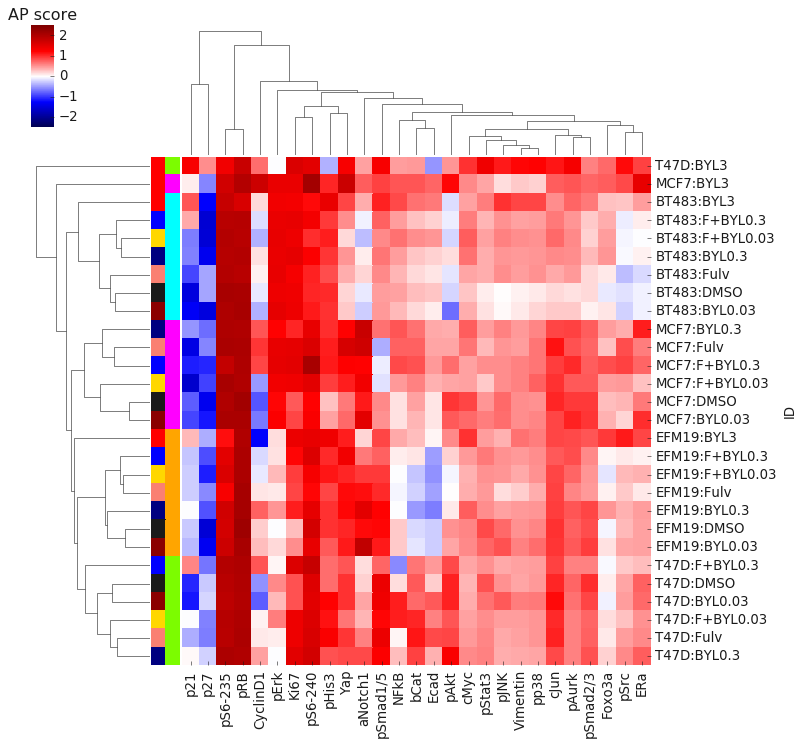

In [45]:
# APscore heatmap
## range(0,54):AP, range(54:108):AC
## use df3, this does not contain F+BYL3

Cell = dict(zip(df3['CellLine'].unique(), ['cyan', 'magenta', 'lawngreen', 'orange']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'snow']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

g = sns.clustermap(df3.iloc[:,range(0,54,2)], row_colors=[row_colors2, row_colors], cmap="seismic", vmin=-2.5, vmax=2.5) #,row_cluster=False 

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('AP score')

plt.show()

In [46]:
#pd.concat([Selected_data.iloc[0,:], Selected_data.iloc[2,:], Selected_data.iloc[3,:], Selected_data.iloc[1,:]], axis=1).T

In [47]:
BT483 = df3.loc[df3['CellLine']=='BT483']
MCF7 = df3.loc[df3['CellLine']=='MCF7']
T47D = df3.loc[df3['CellLine']=='T47D']
EFM19 = df3.loc[df3['CellLine']=='EFM19']

In [48]:
BT483

,pAkt,pAkt_C,pHis3,pHis3_C,bCat,bCat_C,NFkB,NFkB_C,Ecad,Ecad_C,...,pSrc,pSrc_C,p27,p27_C,ERa,ERa_C,CyclinD1,CyclinD1_C,CellLine,Treatment
ID,,,,,,,,,,,,,,,,,,,,,
BT483:DMSO,-0.214834,-0.170539,1.046674,0.928949,0.316720,0.381623,0.458199,0.577573,0.280474,0.360655,...,1.180242,0.904578,0.120404,0.404519,1.031561,0.908968,0.526457,0.983867,BT483,DMSO
BT483:BYL0.03,-0.704201,-0.655903,1.010128,0.748388,0.179951,0.274526,0.339981,0.461877,0.092532,0.254566,...,1.941822,2.054464,0.556410,1.471399,1.869449,2.080546,1.067994,2.050740,BT483,BYL0.03
BT483:F+BYL0.03,-0.214149,-0.254185,1.098303,0.984871,0.561066,0.689404,0.689607,0.799515,0.521877,0.681619,...,1.837038,1.913565,0.652874,1.485323,1.924189,1.907150,1.358183,2.172222,BT483,F+BYL0.03
BT483:Fulv,-0.127732,-0.121988,0.859728,0.798103,0.188806,0.237067,0.358563,0.420979,0.119787,0.129755,...,1.236214,0.983403,0.236326,0.531208,1.267209,1.173075,0.610907,0.781827,BT483,Fulv
BT483:BYL0.3,0.174018,0.152129,0.977354,0.895356,0.273807,0.577593,0.477975,0.612718,0.227606,0.421197,...,1.736892,1.811520,0.595490,1.253522,1.680647,1.671682,1.461332,2.125139,BT483,BYL0.3
BT483:F+BYL0.3,-0.084140,-0.106358,0.961152,0.900189,0.301436,0.445891,0.482634,0.591653,0.225287,0.382191,...,1.930840,2.089808,0.674029,1.195824,1.775347,1.771752,1.711132,2.132057,BT483,F+BYL0.3
BT483:BYL3,-0.173274,0.057963,1.462172,1.444006,0.692311,1.053728,0.887178,0.969918,0.649058,0.959652,...,1.831713,1.920832,0.961797,1.432667,1.666517,1.738913,1.459246,1.332160,BT483,BYL3


In [51]:
df4 = pd.concat([BT483, MCF7, T47D, EFM19], axis=0)

df3 = df4

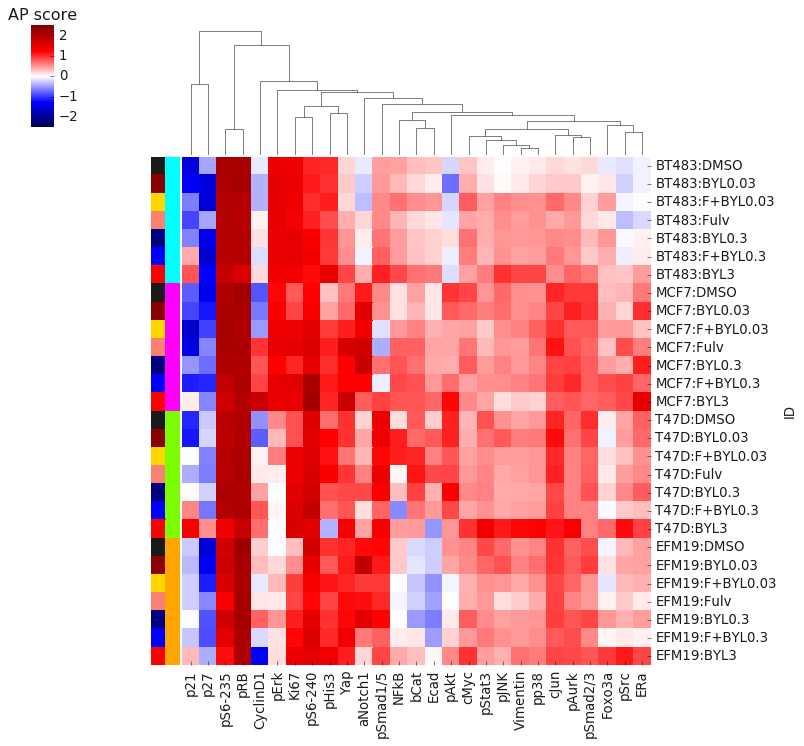

In [52]:
# APscore heatmap
## range(0,54):AP, range(54:108):AC
## use df3, this does not contain F+BYL3

Cell = dict(zip(df3['CellLine'].unique(), ['cyan', 'magenta', 'lawngreen', 'orange']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'snow']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

g = sns.clustermap(df3.iloc[:,range(0,54,2)], row_colors=[row_colors2, row_colors], cmap="seismic", vmin=-2.5, vmax=2.5, row_cluster=False) 

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('AP score')

plt.show()

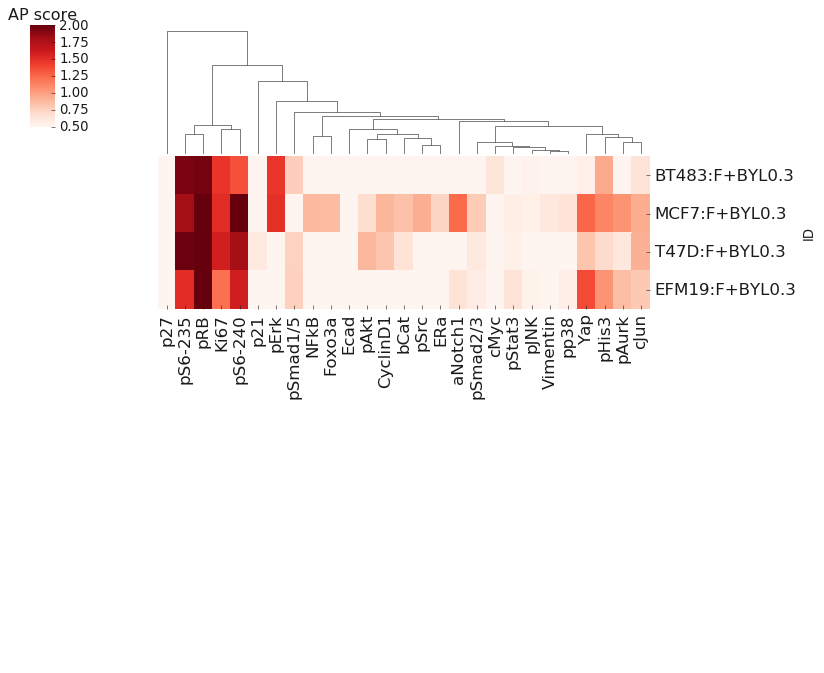

In [53]:
# AP score heatmap, selected samples

Cell = dict(zip(df3['CellLine'].unique(), ['k', 'cyan', 'yellow', 'green']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'grey', 'c', 'pink', 'peru', 'olive', 'skyblue', 'm']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

Selected_data = df3[df3['Treatment']=='F+BYL0.3']
Ordered_data = pd.concat([Selected_data.iloc[0,:], Selected_data.iloc[2,:], Selected_data.iloc[3,:], Selected_data.iloc[1,:]], axis=1).T

g = sns.clustermap(Selected_data.iloc[:,range(0,54,2)].astype(float), cmap="Reds", vmin=0.5, vmax=2, row_cluster=False) 
                   #row_colors=[row_colors, row_colors2]) # row_cluster=False) #, figsize=(12,5))

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=15)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=15)

DendroRow = g.ax_row_dendrogram.get_position()
row = g.ax_heatmap.get_position()

g.ax_row_dendrogram.set_position([DendroRow.x0, DendroRow.y0, row.width*1.1, row.height]) 
g.ax_heatmap.set_position([row.x0, row.y0*5.45, row.width, row.height*0.3]) 
plt.title('AP score')

plt.show()

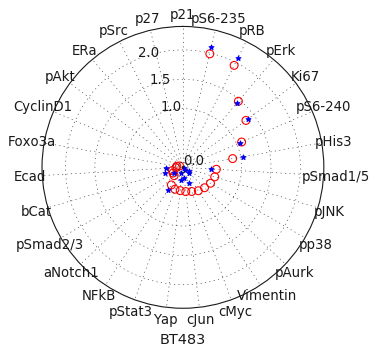

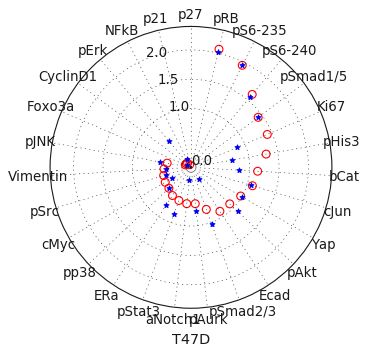

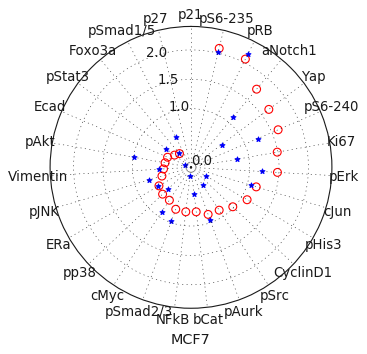

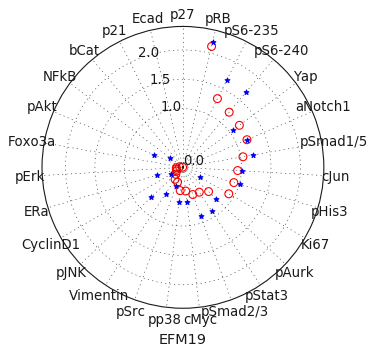

In [54]:
# AP score, polar plot
CellLineList = ['BT483', 'T47D', 'MCF7', 'EFM19']

for WhichCell in CellLineList:

    SelectedTreatment1 = 'Fulv'
    SelectedTreatment2 = 'DMSO'
    idx1 = (df3['Treatment'].isin([SelectedTreatment1, SelectedTreatment2])) & (df3['CellLine'] == WhichCell)

    SelectedDF = df3.iloc[:,range(0,54,2)][idx1].set_index(df3[idx1]['Treatment'])

    df = SelectedDF.T[:27].sort_values(by=[SelectedTreatment1], ascending=True)

    Scores1 = df[SelectedTreatment1]
    Scores2 = df[SelectedTreatment2] #this is DMSO

    NewLabels = list(Scores1.index)

    theta = np.arange(0, 2*pi, 2*pi/27)
    r1 = Scores1
    r2 = Scores2
    theta_degree = theta*57.2958
    
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(222, polar=True)
    c = ax.scatter(theta, r1, color='red', s=50, facecolors='none')
    d = ax.scatter(theta, r2, color='blue', s=20, marker='*')

    ax.set_rmin(0)
    ax.set_rmax(2.4)
    ax.set_theta_zero_location("N")
    lines, labels = thetagrids( theta_degree, (NewLabels) )
    lines, labels = rgrids( (0, 1, 1.5, 2) )

    plt.xlabel(WhichCell, fontsize=13)

    plt.show()

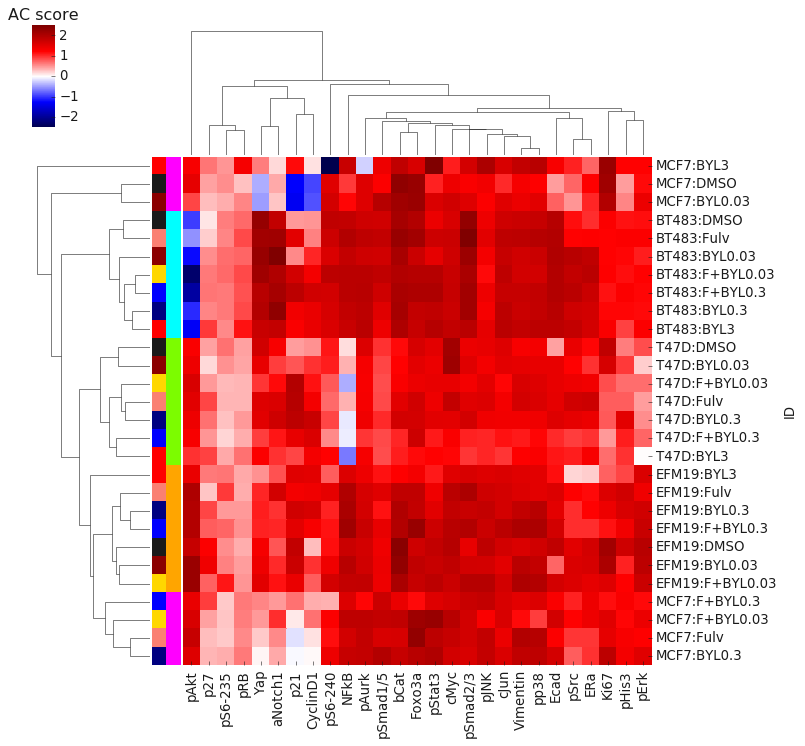

In [55]:
# ACscore heatmap
## range(0,54):AP, range(54:108):AC
## use df3, this does not contain F+BYL3

Cell = dict(zip(df3['CellLine'].unique(), ['cyan', 'magenta', 'lawngreen', 'orange']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'snow']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

data = df3.iloc[:,range(54,108,2)]

#range(0,54):Ap, range(54,108):AE
g = sns.clustermap(data, row_colors=[row_colors2, row_colors], cmap="seismic", vmin=-2.5, vmax=2.5) #,row_cluster=False 

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('AC score')

plt.show()

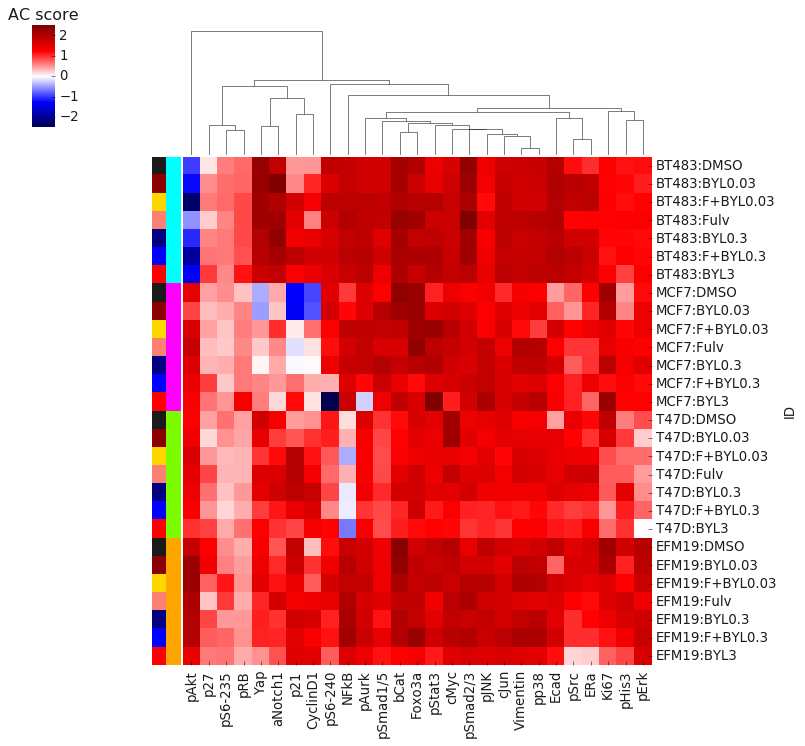

In [57]:
# ACscore heatmap
## range(0,54):AP, range(54:108):AC
## use df3, this does not contain F+BYL3

Cell = dict(zip(df3['CellLine'].unique(), ['cyan', 'magenta', 'lawngreen', 'orange']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'snow']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

data = df3.iloc[:,range(54,108,2)]

#range(0,54):Ap, range(54,108):AE
g = sns.clustermap(data, row_colors=[row_colors2, row_colors], cmap="seismic", vmin=-2.5, vmax=2.5, row_cluster=False) 

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.title('AC score')

plt.show()

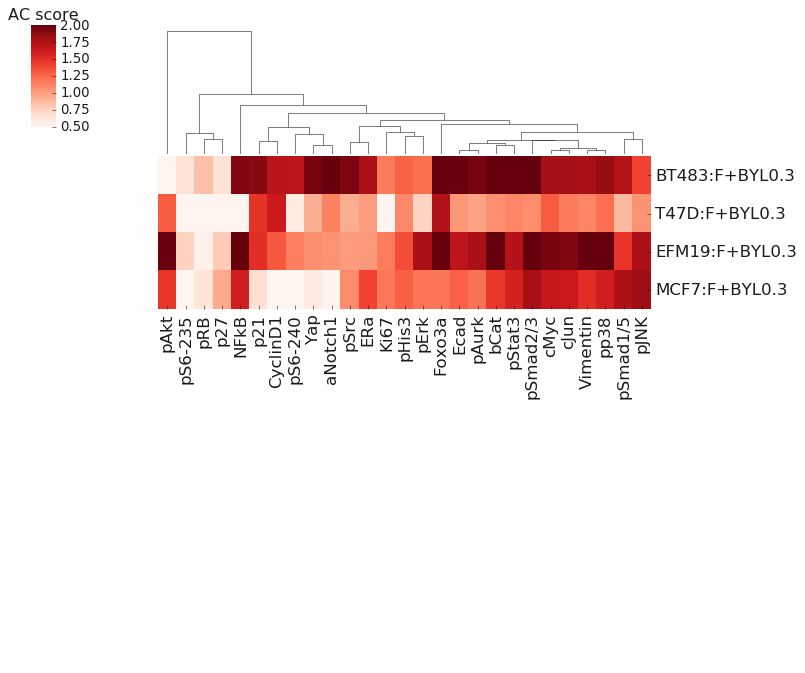

In [56]:
# AC score heatmap, selected samples

Cell = dict(zip(df3['CellLine'].unique(), ['k', 'cyan', 'yellow', 'green']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'grey', 'c', 'pink', 'peru', 'olive', 'skyblue', 'm']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

Selected_data = df3[df3['Treatment']=='F+BYL0.3']
Ordered_data = pd.concat([Selected_data.iloc[0,:], Selected_data.iloc[2,:], 
                          Selected_data.iloc[3,:], Selected_data.iloc[1,:]], axis=1).T

g = sns.clustermap(Ordered_data.iloc[:,range(54,108,2)].astype(float), cmap="Reds", vmin=0.5, vmax=2, row_cluster=False) 
                   #row_colors=[row_colors, row_colors2]) # row_cluster=False) #, figsize=(12,5))

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=15)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=15)

DendroRow = g.ax_row_dendrogram.get_position()
row = g.ax_heatmap.get_position()

g.ax_row_dendrogram.set_position([DendroRow.x0, DendroRow.y0, row.width*1.1, row.height]) 
g.ax_heatmap.set_position([row.x0, row.y0*5.45, row.width, row.height*0.3]) 
plt.title('AC score')

plt.show()

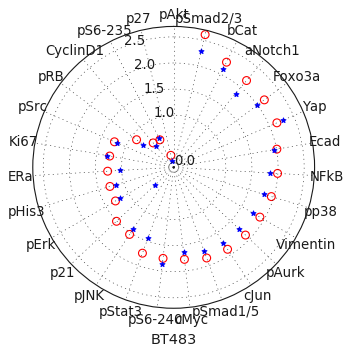

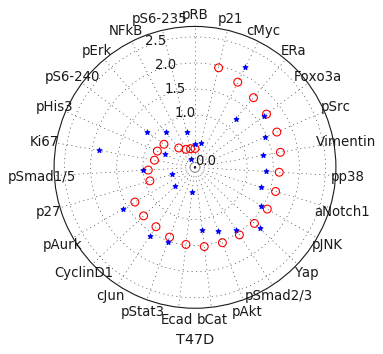

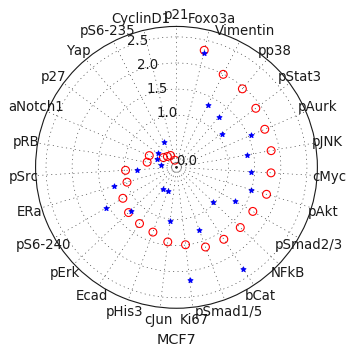

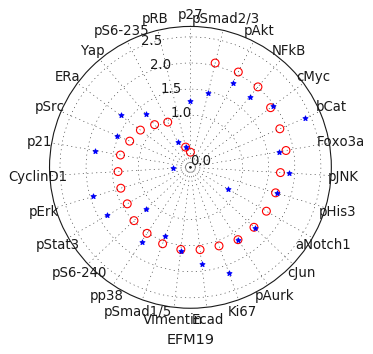

In [58]:
# AC score, polar plot
CellLineList = ['BT483', 'T47D', 'MCF7', 'EFM19']

for WhichCell in CellLineList:

    SelectedTreatment1 = 'Fulv'
    SelectedTreatment2 = 'DMSO'
    idx1 = (df3['Treatment'].isin([SelectedTreatment1, SelectedTreatment2])) & (df3['CellLine'] == WhichCell)

    SelectedDF = df3.iloc[:,range(54,108,2)][idx1].set_index(df3[idx1]['Treatment'])

    df = SelectedDF.T[:27].sort_values(by=[SelectedTreatment1], ascending=True)

    Scores1 = df[SelectedTreatment1]
    Scores2 = df[SelectedTreatment2] #this is DMSO

    NewLabels = list(Scores1.index)

    theta = np.arange(0, 2*pi, 2*pi/27)
    r1 = Scores1
    r2 = Scores2
    theta_degree = theta*57.2958
    
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(222, polar=True)
    c = ax.scatter(theta, r1, color='red', s=50, facecolors='none')
    d = ax.scatter(theta, r2, color='blue', s=20, marker='*')

    ax.set_rmin(0)
    ax.set_rmax(2.7)
    ax.set_theta_zero_location("N")
    lines, labels = thetagrids( theta_degree, (NewLabels) )
    lines, labels = rgrids( (0, 1, 1.5, 2, 2.5) )

    plt.xlabel(WhichCell, fontsize=13)

    plt.show()

# AP + AC scores

In [59]:
df3 = df3.sort_values(by=['CellLine'])

# separate AC and AP sets
dataAC = df3.iloc[:, range(54,108,2)]
dataAP = df3.iloc[:, range(0,54,2)]

# # this is for scaling, if necessary
# distance_AE = np.percentile(dataAE,100) - np.percentile(dataAE,0)
# median_AE = np.percentile(dataAE, 50)
# distance_AP = np.percentile(dataAP,100) - np.percentile(dataAP,0)
# median_AP = np.percentile(dataAP, 50)

# dataAE_scaled = (dataAE - np.percentile(dataAE,0))/distance_AE
# dataAP_scaled = (dataAP - np.percentile(dataAP,0))/distance_AP

dataAdded = dataAP+dataAC
dataAdded['Treatment'] = df3['Treatment']
dataAdded['CellLine'] = df3['CellLine']

# vmax = np.max( np.max(dataAdded.iloc[:,:-1]) )
# vmin = np.min( np.min(dataAdded.iloc[:,:-1]) )

In [60]:
df3.head()

,pAkt,pAkt_C,pHis3,pHis3_C,bCat,bCat_C,NFkB,NFkB_C,Ecad,Ecad_C,...,pSrc,pSrc_C,p27,p27_C,ERa,ERa_C,CyclinD1,CyclinD1_C,CellLine,Treatment
ID,,,,,,,,,,,,,,,,,,,,,
BT483:DMSO,-0.214834,-0.170539,1.046674,0.928949,0.316720,0.381623,0.458199,0.577573,0.280474,0.360655,...,1.180242,0.904578,0.120404,0.404519,1.031561,0.908968,0.526457,0.983867,BT483,DMSO
BT483:BYL0.03,-0.704201,-0.655903,1.010128,0.748388,0.179951,0.274526,0.339981,0.461877,0.092532,0.254566,...,1.941822,2.054464,0.556410,1.471399,1.869449,2.080546,1.067994,2.050740,BT483,BYL0.03
BT483:F+BYL0.03,-0.214149,-0.254185,1.098303,0.984871,0.561066,0.689404,0.689607,0.799515,0.521877,0.681619,...,1.837038,1.913565,0.652874,1.485323,1.924189,1.907150,1.358183,2.172222,BT483,F+BYL0.03
BT483:Fulv,-0.127732,-0.121988,0.859728,0.798103,0.188806,0.237067,0.358563,0.420979,0.119787,0.129755,...,1.236214,0.983403,0.236326,0.531208,1.267209,1.173075,0.610907,0.781827,BT483,Fulv
BT483:BYL0.3,0.174018,0.152129,0.977354,0.895356,0.273807,0.577593,0.477975,0.612718,0.227606,0.421197,...,1.736892,1.811520,0.595490,1.253522,1.680647,1.671682,1.461332,2.125139,BT483,BYL0.3


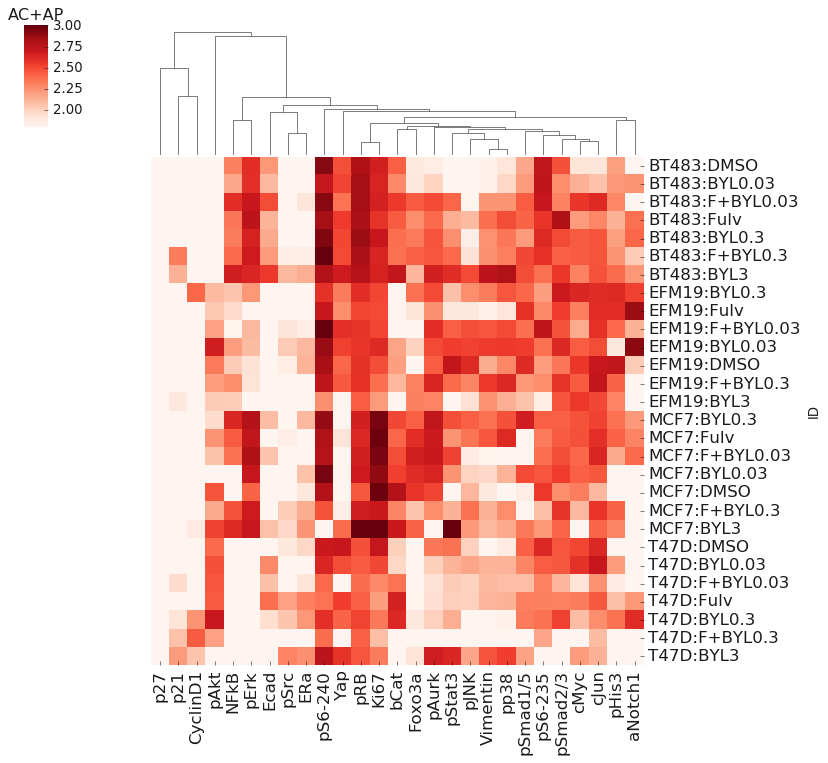

In [61]:
# heatmap

Cell = dict(zip(df3['CellLine'].unique(), ['k', 'cyan', 'yellow', 'green']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'grey', 'c', 'pink', 'peru', 'olive', 'skyblue', 'm']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

g = sns.clustermap(dataAdded.iloc[:,:27], cmap="Reds", vmin=1.8, vmax=3, row_cluster=False) 
                   #row_colors=[row_colors, row_colors2]) # row_cluster=False) #, figsize=(12,5))

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=15)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=15)

plt.title('AC+AP')
plt.show()

In [62]:
# heatmap, selected samples

Cell = dict(zip(df3['CellLine'].unique(), ['k', 'cyan', 'yellow', 'green']))
Cell2 = dict(zip(df3['Treatment'].unique(), ['k', 'grey', 'c', 'pink', 'peru', 'olive', 'skyblue', 'm']))
row_colors = df3['CellLine'].map(Cell)
row_colors2 = df3['Treatment'].map(Cell2)

Selected_data = dataAdded[dataAdded['Treatment']=='F+BYL0.3']

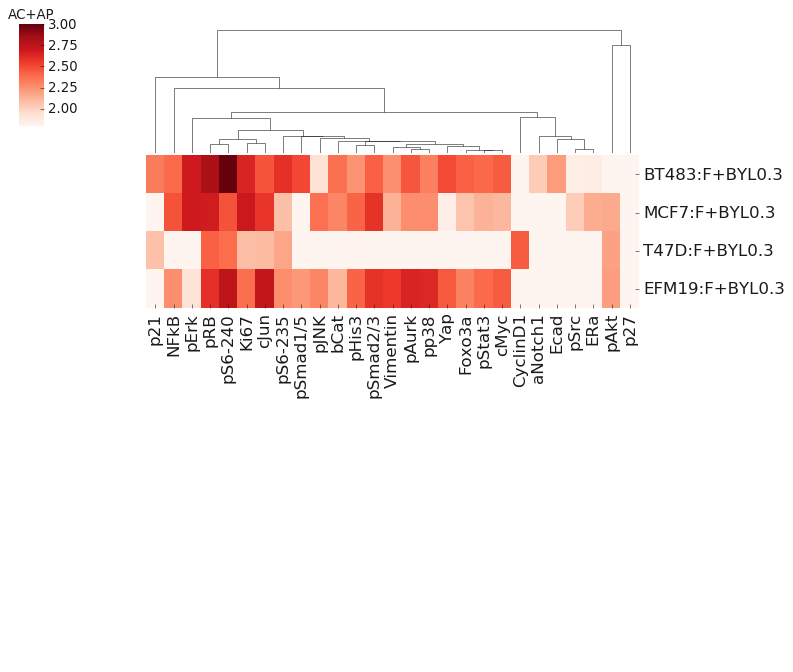

In [63]:
Ordered_data = pd.concat([Selected_data.iloc[0,:], Selected_data.iloc[2,:], Selected_data.iloc[3,:], Selected_data.iloc[1,:]], axis=1).T

g = sns.clustermap(Ordered_data.iloc[:,:27].astype(float), cmap="Reds", vmin=1.8, vmax=3, row_cluster=False) 
                   #row_colors=[row_colors, row_colors2]) # row_cluster=False) #, figsize=(12,5))

plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=15)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=15)

DendroRow = g.ax_row_dendrogram.get_position()
row = g.ax_heatmap.get_position()

g.ax_row_dendrogram.set_position([DendroRow.x0, DendroRow.y0, row.width*1.1, row.height]) 
g.ax_heatmap.set_position([row.x0, row.y0*5.45, row.width, row.height*0.3]) 

plt.title('AC+AP', fontsize=12)
plt.show()

# Polar plot with AP+AC scores

In [64]:
# mpl.style.use('classic')
# mpl.rcParams['figure.facecolor'] = '1'

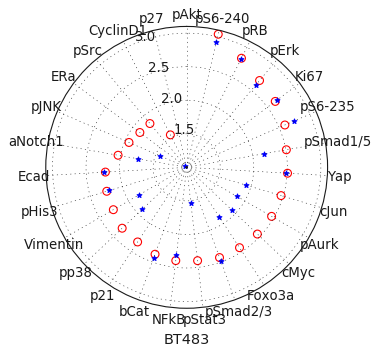

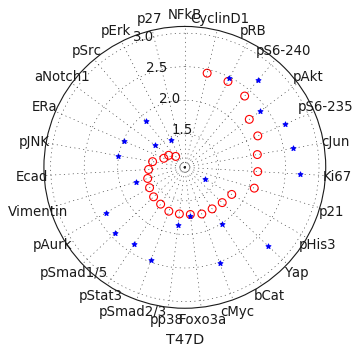

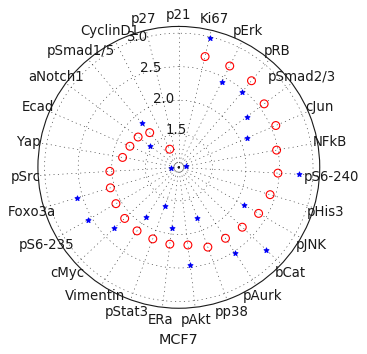

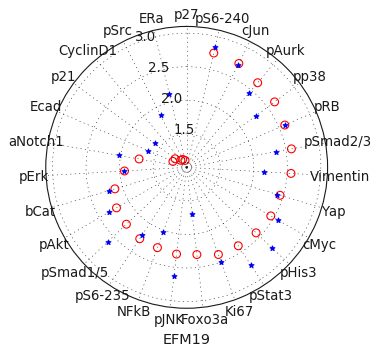

In [65]:
CellLineList = ['BT483', 'T47D', 'MCF7', 'EFM19']

#figure(figsize=[15,15])


for WhichCell in CellLineList:

    SelectedTreatment1 = 'F+BYL0.3'
    SelectedTreatment2 = 'DMSO'
    idx1 = (dataAdded['Treatment'].isin([SelectedTreatment1, SelectedTreatment2])) & (dataAdded['CellLine'] == WhichCell)



    SelectedDF = dataAdded[idx1].set_index(dataAdded[idx1]['Treatment'])

    df = SelectedDF.T[:27].sort_values(by=[SelectedTreatment1], ascending=True)

    Scores1 = df[SelectedTreatment1]
    Scores2 = df[SelectedTreatment2] #this is DMSO


    NewLabels = list(Scores1.index)

    theta = np.arange(0, 2*pi, 2*pi/27)
    r1 = Scores1
    r2 = Scores2
    theta_degree = theta*57.2958
    
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(222, polar=True)
    c = ax.scatter(theta, r1, color='red', s=50, facecolors='none')
    d = ax.scatter(theta, r2, color='blue', s=20, marker='*')

    ax.set_rmin(1)
    ax.set_rmax(3.1)
    ax.set_theta_zero_location("N")
    lines, labels = thetagrids( theta_degree, (NewLabels) )
    lines, labels = rgrids( (1.5, 2, 2.5, 3) )

    plt.xlabel(WhichCell, fontsize=13)

    plt.show()

# AC and AP scatter plot

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


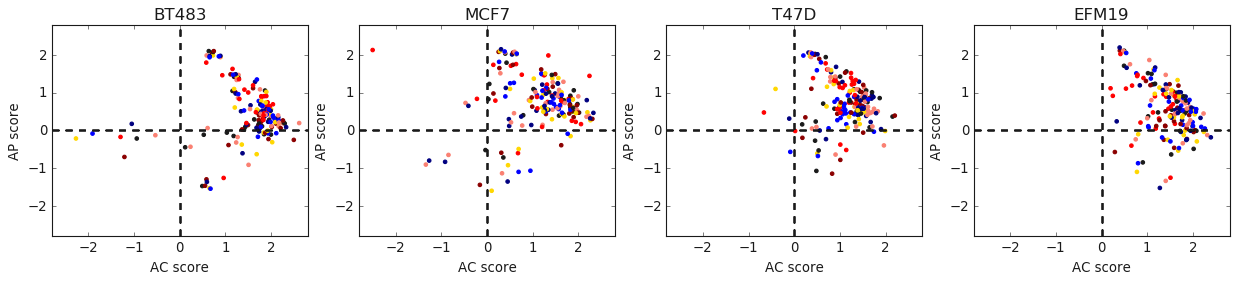

In [66]:
CellLineList = ['BT483', 'MCF7', 'T47D', 'EFM19']
treatment = ['DMSO', 'BYL0.03', 'F+BYL0.03', 'Fulv', 'BYL0.3', 'F+BYL0.3', 'Tram', 'BYL3']
color = ['k', 'darkred', 'gold', 'salmon', 'navy', 'blue', 'red', 'k']

plt.figure(figsize=(19,3.3))

for Ab in range(27):
    for k, WhichCell in enumerate(CellLineList):
        plt.subplot(1, 4, k+1)

        idx1 = (df3['CellLine'] == WhichCell)

        AC_value = df3.iloc[:,range(54,108,2)][idx1]
        AP_value = df3.iloc[:,range(0,54,2)][idx1]


        plt.scatter(AC_value.iloc[:,Ab], AP_value.iloc[:,Ab], marker='o', s=10, c=color, edgecolors='face')
        plt.plot([-2.8,2.8], [0, 0], c='k', linestyle='dashed')
        plt.plot([0, 0], [-2.8,2.8], c='k', linestyle='dashed')

        #m=0
        #for x, y in zip(AC_value.iloc[:,Ab], AP_value.iloc[:,Ab]):
         #   plt.text(x, y, str(m+1), color=color[m], fontsize=10)
          #  m=m+1

        plt.ylim([-2.8,2.8])
        plt.xlim([-2.8,2.8])
        plt.ylabel('AP score')
        plt.xlabel('AC score')
        plt.title(WhichCell, fontsize=15)


plt.show()

In [84]:
treatment


['F+BYL0.3']

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


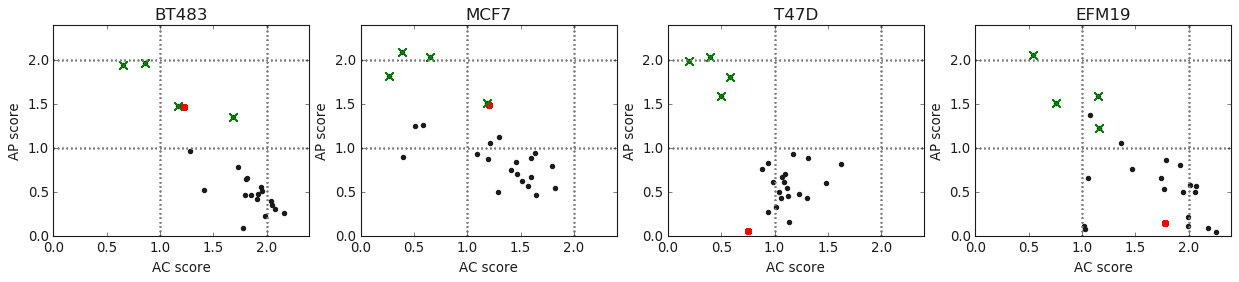

In [113]:
CellLineList = ['BT483', 'MCF7', 'T47D', 'EFM19']
treatment = 'F+BYL0.3'
color = ['red']

plt.figure(figsize=(19,3.3))

for Ab in range(27):
    for k, WhichCell in enumerate(CellLineList):
        plt.subplot(1, 4, k+1)

        idx1 = (df3['CellLine'] == WhichCell) & (df3['Treatment'] == treatment)

        AC_value = df3.iloc[:,range(54,108,2)][idx1]
        AP_value = df3.iloc[:,range(0,54,2)][idx1]


        plt.scatter(AC_value.iloc[:,Ab], AP_value.iloc[:,Ab], marker='o', s=15, c='k', edgecolors='face')
        
        plt.scatter(AC_value.iloc[:,5], AP_value.iloc[:,5], marker='o', s=25, c='red', edgecolors='face')
        plt.scatter(AC_value.iloc[:,6], AP_value.iloc[:,6], marker='x', s=50, c='green', edgecolors='face')
        plt.scatter(AC_value.iloc[:,7], AP_value.iloc[:,7], marker='x', s=50, c='green', edgecolors='face')
        plt.scatter(AC_value.iloc[:,8], AP_value.iloc[:,8], marker='x', s=50, c='green', edgecolors='face')
        plt.scatter(AC_value.iloc[:,10], AP_value.iloc[:,10], marker='x', s=50, c='green', edgecolors='face')
        
        #plt.plot([-2.8,2.8], [0, 0], c='k', linestyle='dashed')
        #plt.plot([0, 0], [-2.8,2.8], c='k', linestyle='dashed')
        
        plt.plot([1, 1], [0,2.8], c='gray', linestyle=':')
        plt.plot([2, 2], [0,2.8], c='gray', linestyle=':')
        plt.plot([0,2.8], [1, 1], c='gray', linestyle=':')
        plt.plot([0,2.8], [2, 2], c='gray', linestyle=':')
        

        #m=0
        #for x, y in zip(AC_value.iloc[:,Ab], AP_value.iloc[:,Ab]):
         #   plt.text(x, y, str(m+1), color=color[m], fontsize=10)
          #  m=m+1

        plt.ylim([0,2.4])
        plt.xlim([0,2.4])
        plt.ylabel('AP score')
        plt.xlabel('AC score')
        plt.title(WhichCell, fontsize=15)


plt.show()

C:\Users\sl456\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


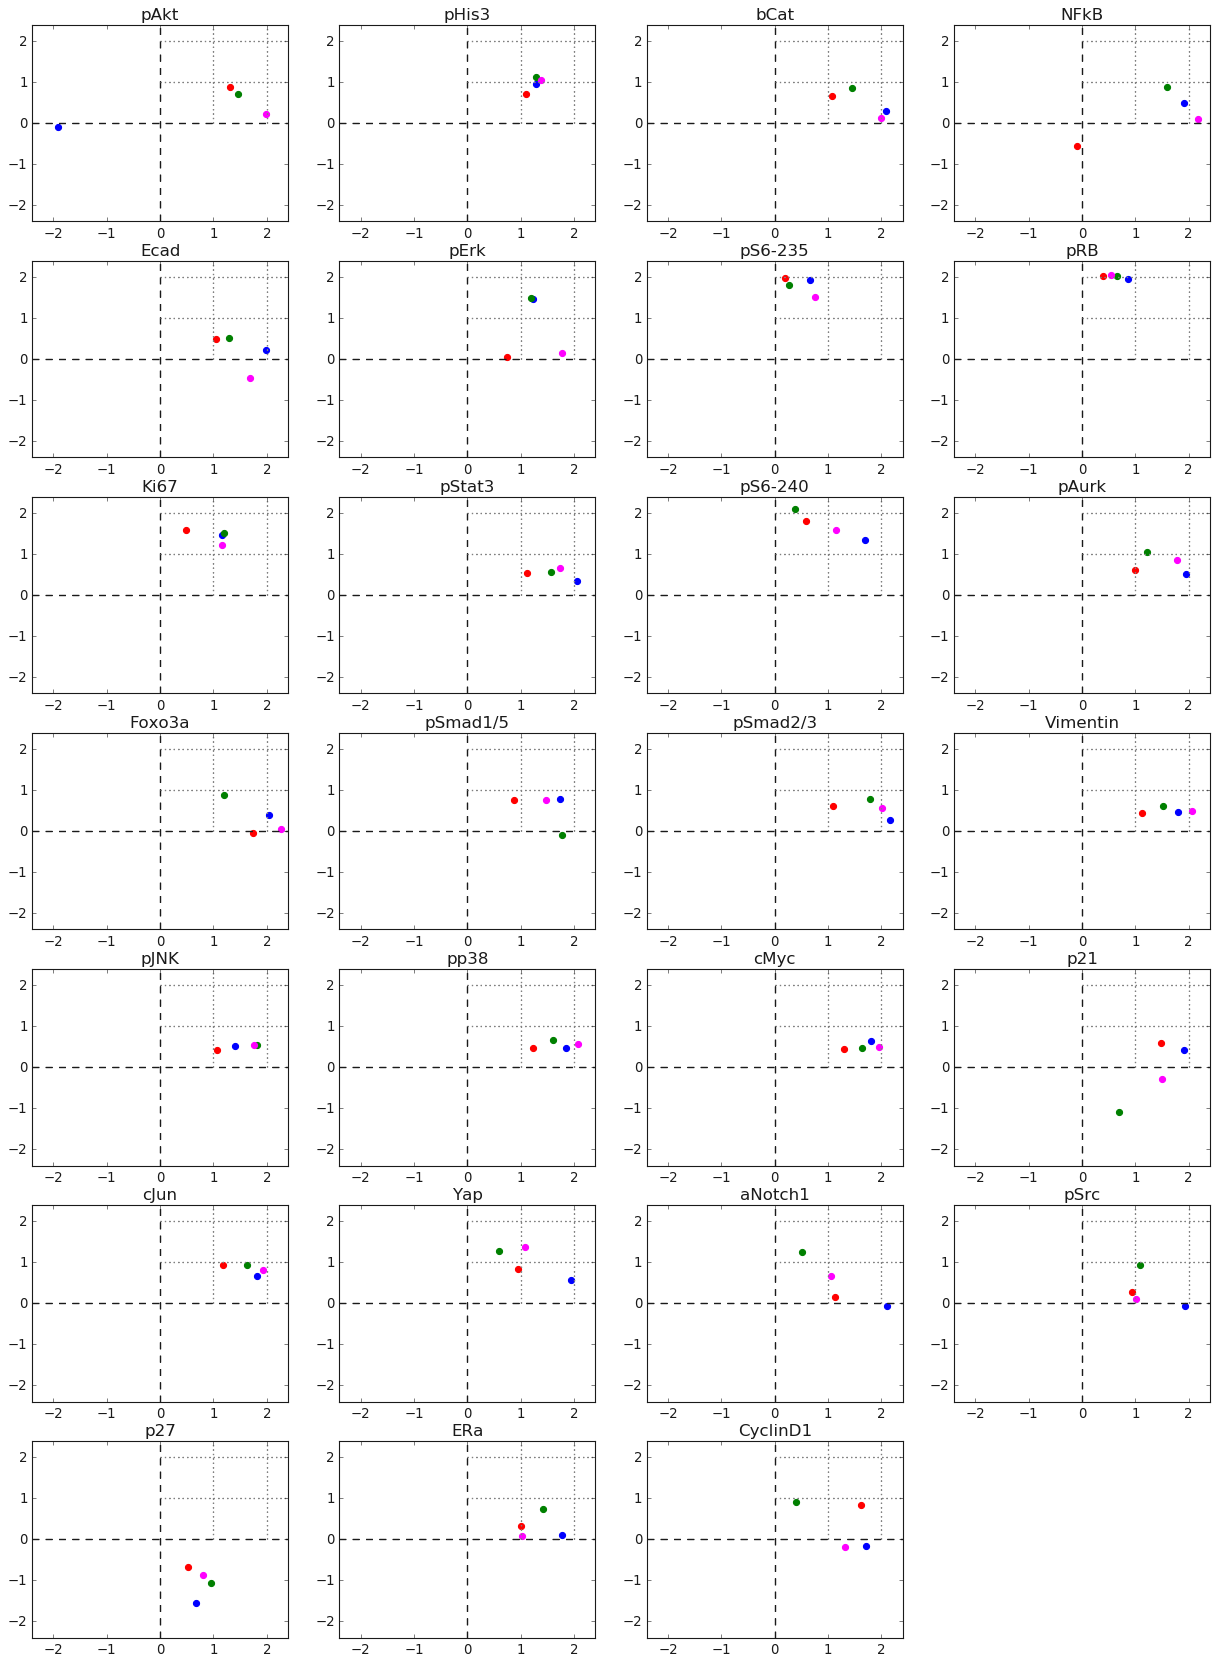

In [129]:
CellLineList = ['BT483', 'MCF7', 'T47D', 'EFM19']
treatment = 'F+BYL0.3'
color = ['blue', 'green', 'red', 'magenta']

plt.figure(figsize=(19,3.6*7))

for Ab in range(27):
    for k, WhichCell in enumerate(CellLineList):
        plt.subplot(7, 4, 1+Ab)

        idx1 = (df3['CellLine'] == WhichCell) & (df3['Treatment']==treatment)

        AC_value = df3.iloc[:,range(54,108,2)][idx1]
        AP_value = df3.iloc[:,range(0,54,2)][idx1]


        plt.scatter(AC_value.iloc[:,Ab], AP_value.iloc[:,Ab], marker='o', c=color[k], edgecolors='face', s=30)
        plt.plot([-2.4,2.4], [0, 0], c='k', linestyle='dashed')
        plt.plot([0, 0], [-2.4,2.4], c='k', linestyle='dashed')

        plt.plot([1, 1], [0,2.8], c='gray', linestyle=':')
        plt.plot([2, 2], [0,2.8], c='gray', linestyle=':')
        plt.plot([0,2.8], [1, 1], c='gray', linestyle=':')
        plt.plot([0,2.8], [2, 2], c='gray', linestyle=':')
        
#         m=0
#         for x, y in zip(AC_value.iloc[:,Ab], AP_value.iloc[:,Ab]):
#             plt.text(x, y, str(m+1), color=color[m], fontsize=10)
#             m=m+1

        plt.ylim([-2.4,2.4])
        plt.xlim([-2.4,2.4])
        #plt.ylabel(AC_value.columns[Ab])
        plt.title(AC_value.columns[Ab], fontsize=15)


plt.show()